## Nama : Jonathan Jeremia V.V.S.
## NIM : 09011181823007

# Akurasi Dataset Diabetes Pima Indian (SVM)

Dataset yang digunakan (Pima Indian Diabetes) yang akan digunakan pada kali ini adalah dataset yang disediakan oleh <b>UCI Machine Learning</b>. Dataset ini diambil dari <b>National Institute of Diabetes and Digestive and Kidney Diseases</b>. Dataset ini terdiri dari variable medis yang berbeda, seperti catatan kehamilan, BMI (Body Mass Index), kadar insulin, usia, konsentrasi glukosa, tekanan darah diastolik, ketebalan lipatan kulit trisep, fungsi silsilah diabetes, dll. Dataset ini memiliki 768 data pasien dimana semua pasien adalah perempuan dan setidaknya berusia 21 tahun.<br><br>
Research paper link : https://dl.acm.org/citation.cfm?id=3297737<br>
Datasets (Kaggle) : https://www.kaggle.com/uciml/pima-indians-diabetes-database

### Masukkan library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

Penjelasan tentang library :<br>
- Library numpy digunakan untuk memproses data array.<br>
- Library pandas digunakan untuk mengolah dataset<br>
- Library matplotlib digunakan untuk membuat visualisasi data yang akan diolah.<br>

### Baca dan cek dataset

In [2]:
data_frame = pd.read_csv("datasets.csv")
data_frame.shape

(768, 9)

Disini kita memasukkan dataset ke dalam dataframe, kemudian menggunakan perintah <b>data_frame.shape</b> kita menemukan bahwa dataset ini memiliki 768 baris serta 9 kolom fitur.

Sebagai bukti bisa dilihat dengan menggunakan perintah <b>.head()</b> maupun <b>.tail()</b>

In [3]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_frame.tail(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Disini saya membuktikan bahwa dataset ini memiliki 768 data serta 9 kolom fitur.

#### Deskripsi

| Fitur  | Deskripsi | 
|--------------|-------------|
| num_preg     | Jumlah kehamilan         |
| glucose_conc | Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral         |
| diastolic_bp | Tekanan darah diastolik (mm Hg) |
| skin_thickness | Ketebalan lipatan kulit trisep (mm) |
|insulin | Insulin serum 2 jam (mu U/ml) |
| bmi |  (BMI) Body mass index (berat dalam kg/(tinggi dalam m)^2) |
| diab_pred |  Fungsi silsilah diabetes |
| Age (years) | Umur (tahun)|
| diabetes | Kelas Variabel (1=True, 0=False) | 

### Cek value null

In [5]:
print (data_frame.isnull().values.any())

False


Tidak ada value null, yang berarti dataset ini baik untuk digunakan.

### Cek Korelasi Fitur
Fitur ini membantu menvisualisasikan data dengan warna. Warna merah paling memiliki korelasi, dan warna ungu memiliki sedikit korelasi

In [6]:
def korelasi_plot(data_frame):
    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(13, 13))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

Data visualisasi dengan gambar sebagai berikut.

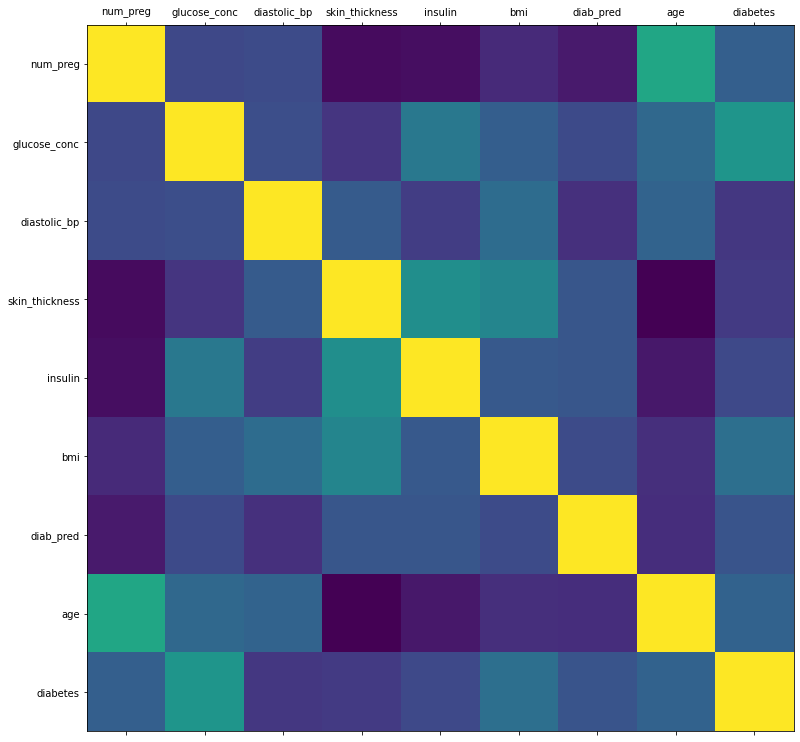

In [7]:
korelasi_plot(data_frame)

Korelasi data berdasarkan angka float.

In [8]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Perhatikan pada kolom diabetes, 1 = True 0 = False

### Cek distribusi kelas

In [10]:
obs = len(data_frame)
true = len(data_frame.loc[data_frame['diabetes'] == 1])
false = len(data_frame.loc[data_frame['diabetes'] == 0])
print("Persentase Orang Diabetes :  {0} ({1:2.2f}%)".format(true, ((1.0 * true)/(1.0 * obs)) * 100))
print("Persentase Orang Tidak Diabetes: {0} ({1:2.2f}%)".format(false, ((1.0 * false)/(1.0 * obs)) * 100))

Persentase Orang Diabetes :  268 (34.90%)
Persentase Orang Tidak Diabetes: 500 (65.10%)


### Split data

Disini ditentukan 70% untuk data training, 30% untuk test

In [11]:
from sklearn.model_selection import train_test_split

nama_fitur = ['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']
prediksi = ['diabetes']

X = data_frame[nama_fitur].values
y = data_frame[prediksi].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

Untuk cek data yang divalidasi benar, lakukan cara berikut

In [12]:
train_value = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
test_value = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% pada set training".format(train_value * 100))
print("{0:0.2f}% pada set test".format(test_value * 100))

69.92% pada set training
30.08% pada set test


Cek bahwa prediksi sudah dipisah (split)

In [13]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 1]), (len(data_frame.loc[data_frame['diabetes'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 0]), (len(data_frame.loc[data_frame['diabetes'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 197 (36.69%)
Training False : 340 (63.31%)

Test True      : 71 (30.74%)
Test False     : 160 (69.26%)


### Prepasi Data Setelah Split

In [14]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Disini kita akan mengecek baris yang mempunyai nilai 0.

In [15]:
print("Baris yang ada di dataframe {0}".format(len(data_frame)))
print("Baris yang mempunyai nilai 0 di glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("Baris yang mempunyai nilai 0 di diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("Baris yang mempunyai nilai 0 di skin_thickness: {0}".format(len(data_frame.loc[data_frame['skin_thickness'] == 0])))
print("Baris yang mempunyai nilai 0 di insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("Baris yang mempunyai nilai 0 di bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("Baris yang mempunyai nilai 0 di diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("Baris yang mempunyai nilai 0 di age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))

Baris yang ada di dataframe 768
Baris yang mempunyai nilai 0 di glucose_conc: 5
Baris yang mempunyai nilai 0 di diastolic_bp: 35
Baris yang mempunyai nilai 0 di skin_thickness: 227
Baris yang mempunyai nilai 0 di insulin: 374
Baris yang mempunyai nilai 0 di bmi: 11
Baris yang mempunyai nilai 0 di diab_pred: 0
Baris yang mempunyai nilai 0 di age: 0


#### Hubungkan semuanya dengan metode mean

In [16]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

## Training Data - Support Vector Machine

In [17]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)

svm.fit(X_train, y_train.ravel())

SVC(C=1, kernel='linear', random_state=0)

In [18]:
# mengembalikan array ke hasil prediksi
prediksidata = svm.predict(X_train)

In [19]:
from sklearn import metrics

akurasi_train = metrics.accuracy_score(y_train, prediksidata)

print ("Akurasi train : {0:.4f}".format(akurasi_train))

Akurasi train : 0.7672


In [20]:
prediksi_svm = svm.predict(X_test)

akurasi_test = metrics.accuracy_score(y_test, prediksi_svm)

print ("Akurasi tes : {0:.4f}".format(akurasi_test))

Akurasi tes : 0.7965


In [21]:
print ("Confusion Matrix untuk Support Vector Machine")
# Label di set ke 1=True untuk kiri atas dan 0=false untuk kanan bawah
print ("{0}".format(metrics.confusion_matrix(y_test, prediksi_svm, labels=[1, 0])))

Confusion Matrix untuk Support Vector Machine
[[ 50  21]
 [ 26 134]]


In [22]:
print ("Laporan Klasifikasi\n")
# Label di set ke 1=True untuk kiri atas dan 0=false untuk kanan bawah
print ("{0}".format(metrics.classification_report(y_test, prediksi_svm, labels=[1, 0])))

Laporan Klasifikasi

              precision    recall  f1-score   support

           1       0.66      0.70      0.68        71
           0       0.86      0.84      0.85       160

    accuracy                           0.80       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.80      0.80      0.80       231



# Penjelasan, serta rumus yang digunakan

Untuk menentukan angka yang digunakan, ada faktor sebagai berikut :
- True Positive (TP): Hasil prediksi ya dan pasien mengidap diabetes.
- True Negative (TN): Hasil prediksi tidak dan pasien tidak menderita diabetes.
- False Positive (FP): Hasil prediksi adalah ya tetapi pasien tidak benar-benar mengidap diabetes (Juga dikenal sebagai "Kesalahan tipe 1").
- False Negative (FN): Hasil prediksi tidak tetapi pasien ada diabetes (Juga dikenal sebagai "Kesalahan tipe 2").

## Rumus yang digunakan

### Akurasi : (TP+TN) / (TP + FP + FN + TN)
Akurasi adalah sebuah metode untuk melihat apakah rasio prediksi yang dilakukan oleh model (SVM) ini akurat atau tidak.

### TPR = Sensitivitas = Recall : TP / (TP + FN)
Recall digunakan untuk melihat rasio kebenaran serta sensitivitas dimana akurasi ini memberitahu berapa rasio kejadian positif dengan penderita yang benar-benar menderita diabetes.

### Specificity = TNR : TN / (TN + FP)
TNR atau True Negative Rate digunakan untuk mengukur rasio orang yang tidak menderita diabetes, di dalam model prediksi disebut sebagai non-diabetes.

### Precision : TP / (TP + FP)
Presisi adalah jumlah skor positif kemudian dibagi jumlah skor positif yang diprediksi oleh SVM.

### F1 : 2*(Recall * Precision) / Recall + Precision
Pengukuran F1 adalah rata-rata dari recall dan presisi. Performa yang baik akan menghasilkan 1, sedangkan performa yang buruk akan menghasilkan 0.


## Kesimpulan

Bahwa dataset ini mempunyai data yang cukup bagus, dan pengolahan dengan metode SVM membuat prediksi yang hampir memuaskan, dimana nilai <b>F1</b> mendekati angka 1 dengan akurasi puncak mencapai 80%